<center><b><h1>Investigation of Enzyme Kinetics Through Python Simulations</h1></b></center>
<center><h2>Schrodinger's Cats: Deqi, Fadhil, Wayne</h2></center>

<img src = "https://www.genome.gov/sites/default/files/tg/en/illustration/enzyme.jpg" width=50%>
<center><i>Source: https://www.genome.gov/genetics-glossary/Enzyme</i></center>

Enzymes are protein catalysts that accelerate biochemical reactions critical to life. They possess active sites(s) specific to the substrate(s)/reactant(s) they catalyse. Enzymes catalyse reactions in multiple possible ways, including weakening the bonds in the substrate, acid/base catalysis, and exerts proximity and orientation effects, speeding up the rates of chemical reactions by orders of magnitude.

Biologists often run kinetic analyses to investigate the behaviours and properties of a certain enzyme. Since the reaction processes include systems of differential equations which are difficult to solve by hand without the usage of approximations, computational modelling is an efficient way of solving them. 

In this notebook, we seek to teach the Michaelis-Menten mechanism by modelling and visualising it. We will also be going through the effects of competitive inhibition, and the related Theorell-Chance mechanism. Finally, we will explore the real-world example of the action of alcohol dehydrogenase (ADH) upon ethanol.

<center><b>--------------------------Friendly note: if you want to use the widgets, please run the corresponding cell first.---------------------</b></center>

# 1. Importing Necessary Packages

In [1]:
%matplotlib notebook
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

# 2.  Michaelis-Menten Model for One Enzyme & One Substrate Combination
$$\require{mhchem}$$ 

For an ideal simple enzyme, acting on one substrate molecule to produce one product molecule, we have the following elementary steps: 
<br></br>
<center>$\large\ce{E + S <=>[k_1][k_{-1}] ES ->[k_2] E + P}$</center>
<br></br>

<center>E: Enzyme, S: Substrate, ES: Enzyme-substrate complex, P: Product</center>
   

The rate of a reaction is equal to the product of its rate constant and the concentrations of the reactants raised to the power of their stoichiometric coefficients.

For example, the rate of the enzyme and substrate binding is equal to the product of $k_1$, and the concentration of the reactants [E] and [S]: <br>
Therefore, rate of E and S binding = $k_1[E][S]$. 

This rate of E and S binding is also the depletion rate of the enzyme due to the binding. 
The enzyme is also regenerated through the dissociation of the ES complex, and the formation of the product from the ES complex. These 2 processes regenerates the enzyme at a rate of $k_{-1}[ES]$ and  $k_2[ES]$ respectively. <br><br>
Summing up these 3 rates, we can obtain the rate of change of the enzyme, $\frac{d[E]}{dt}$, as shown below. 


## 2.1 The Michaelis-Menten mechanics are bounded by the following equations: 

$\large1. \frac{d[E]}{dt} = (-k_1 [E][S] + k_{-1}[ES] + k_2[ES]);$<br>
$\large2. \frac{d[S]}{dt} = (-k_1 [E][S] + k_{-1}[ES]);$<br>
$\large3. \frac{d[ES]}{dt} = (k_1 [E][S] - k_{-1}[ES] - k_2[ES] );$<br>
$\large4. \frac{d[P]}{dt} = (k_2 [ES]).$<br> (Silverstein, 2016)
   
### The rate of the reaction, v, which is also the rate of formation of the product is given by: 
   $\large v = \frac{d[P]}{dt}=k_2[ES]$, 
   where $k_2$ is the rate constant of the rate-determining step (Silverstein, 2016).
   
## In our model, the function 'mich_mt()' takes eight arguments:
$t$,  the duration of reaction;   
$E$,  initial concentration of enzyme;   
$S$,  initial concentration of substrate;  
$ES$, initial concentration of enzyme-substrate complex;  
$P$,  initial concentration of product;  
$k_1$, the rate constant of the forward reaction (enzyme combining with substrate);<br>
$k_{-1}$, the rate constant of the backward reaction (enzyme-substrate dissociating);<br>
$k_2$, the rate constant of the complex converting into product (reaction rate)
  

The outputs of the function are lists of concentrations and corresponding time intervals.
   
   
   

   

In [2]:
def mich_mt(t, E, S, k2, ES=0, P=0, k1= 1, k_1= 0.5):
    '''function that takes the rate constants, time period and initial concentration of 
    each entity and generates lists of the concentrations of each entity over the time period'''
    
    # set regular time intervals, create empty lists to store the data generated
    time = 0 
    d_time = 0.01
    time_list = []
    E_list = []
    S_list = []
    ES_list = []
    P_list = []
    
    # the 'while' loop allows continuous data generation
    while time < t:
        
        # dissect the differential equations using Euler's method
        d_E = (-k1 * E * S + k_1 * ES + k2 * ES) * d_time
        d_S = (-k1 * E * S + k_1 * ES) * d_time
        d_ES = (k1 * E * S - k_1 * ES - k2 * ES ) * d_time
        d_P = (k2 * ES) * d_time
        
        # slot the values into the lists
        E_list.append(E)
        S_list.append(S)
        ES_list.append(ES)
        P_list.append(P)
        time_list.append(time)
        
        # update the new values
        E += d_E
        S += d_S 
        ES += d_ES
        P += d_P
        time += d_time
        
    return E_list, ES_list, S_list, P_list, time_list

## 2.2 A Simple Plot Using 'mich_mt()'. 

### This plot is based on the following parameters;

Initial enzyme concentration, $[E]_o = 0.1M$,  

Initial substrate concentration, $[S]_o = 1.00M$, 

$k_1 = 1$

$k_{-1} = 0.5$

$k_2 = 0.1$, 

<IPython.core.display.Javascript object>


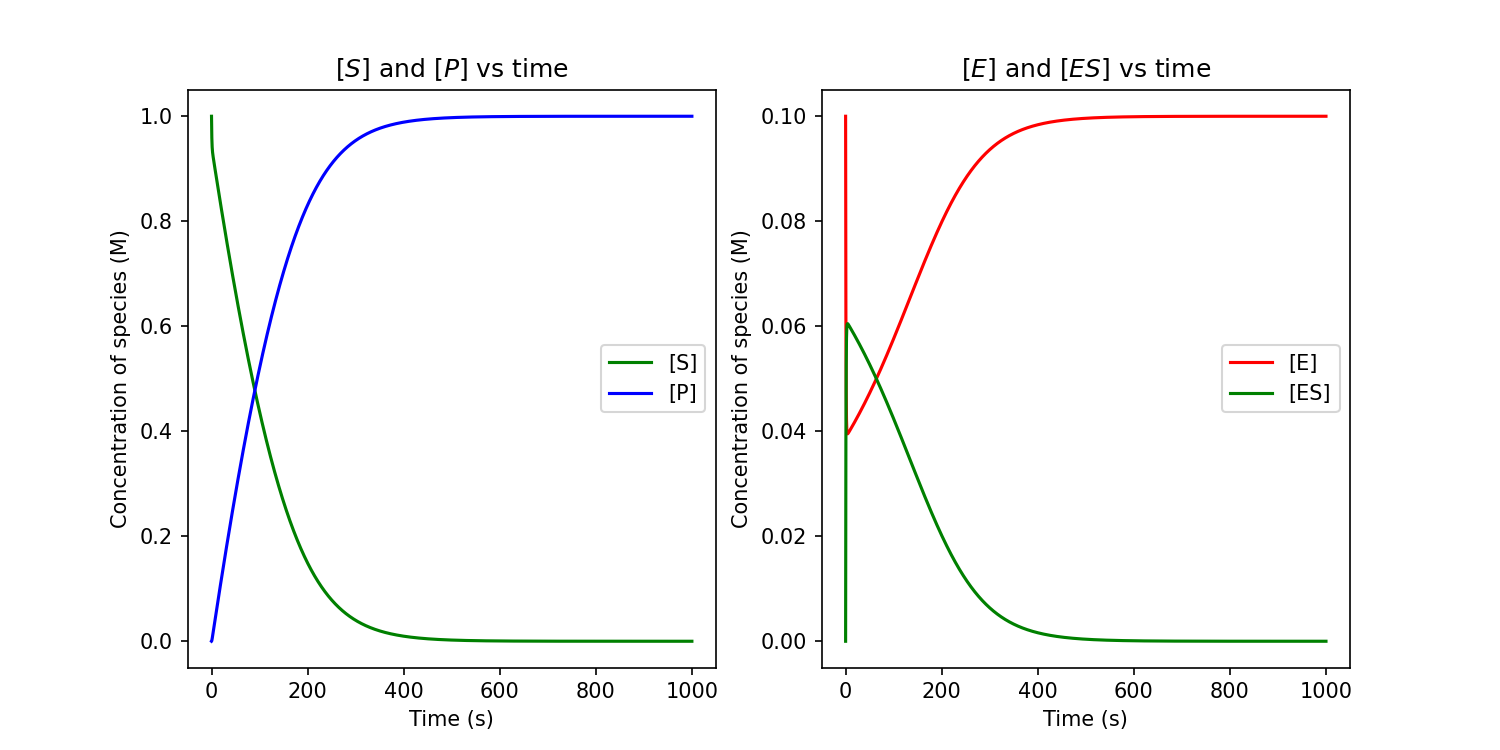

In [3]:
# parameters to put into function to generate lists
t = 1000
E = 0.1
S = 1
k2 = 0.1

e, es, s, p, time = mich_mt(t, E, S, k2)

# plotting graph of concentrations vs time
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax[0].plot(time, s, color = 'g', label = '[S]')
ax[0].plot(time, p, color = 'b', label = '[P]')
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration of species (M)")
ax[0].set_title("$[S]$ and $[P]$ vs time")
ax[0].legend()

ax[1].plot(time, e, color = 'r', label = '[E]')
ax[1].plot(time, es, color = 'g', label = '[ES]')
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration of species (M)")
ax[1].set_title("$[E]$ and $[ES]$ vs time")
ax[1].legend()

plt.show()

#### Analysis of graphs:

At the start, $[E]$ and $[S]$ decrease rapidly since the first step of the reaction (i.e. substrates combine to enzymes) is very fast. This is achieved by setting a large $k_1$ value comparing to $k_2$ and $k_{-1}$. 

In the middle, $[E]$ increases slowly as the product is being formed. This matches the fact the step 2 is the rate-determining step.

In the end, $[P]$ has a slower formation rate. This is due to the decrease in $[S]$, which leads to less frequent effective collisions among the particles.

### A plot with widgets! This allows us to visualise the change in concentration curves by adjusting the initial concentrations and $k_2$.

--------------------------One friendly note: if you want to use the widgets, please run the corresponding cell again.---------------------

<IPython.core.display.Javascript object>


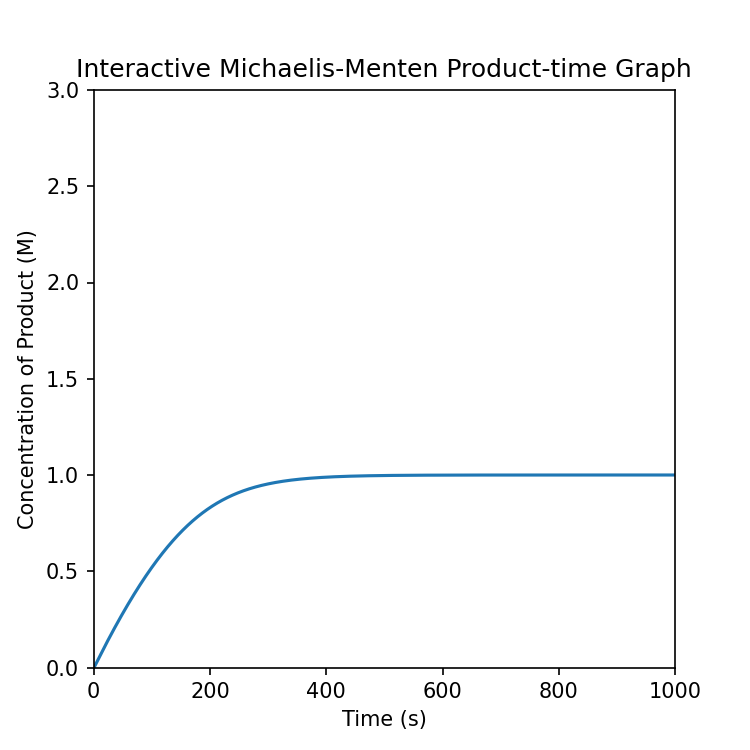

interactive(children=(FloatSlider(value=1.0, description='enzyme_factor', max=3.0), FloatSlider(value=1.0, des…

In [4]:
# extracting product conc. list and time list 
p, time = mich_mt(1000, E= 0.1, S = 1, k2 = 0.1)[3:5]
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(time, p)
ax.set_ylim(0, 3)
ax.set_xlim(0,1000)
plt.xlabel("Time (s)")
plt.ylabel("Concentration of Product (M)")
plt.title("Interactive Michaelis-Menten Product-time Graph")

# plotting interactive graph with sliders to vary enzyme conc., substrate conc, and k2 rate. 
def update1(enzyme_factor = 1.00, substrate_factor = 1.00, k2_factor = 1.00):
    line.set_ydata(mich_mt(1000, E= 0.1* enzyme_factor, S = 1 * substrate_factor, k2= 0.1 * k2_factor )[3])
    fig.canvas.draw_idle()

interact(update1, enzyme_factor = widgets.FloatSlider(min=0, max= 3, value = 1), 
         substrate_factor = widgets.FloatSlider(min=0, max= 3, value = 1), 
         k2_factor = widgets.FloatSlider(min=0, max= 3, value = 1))
plt.show()

#### Analysis of the graph:

As enzyme_factor goes high,the initial gradient increases since there are more available binding sites. If we keep substrate_factor constant, the horizontal asymptote of the graph does not change.

As substrate_factor goes high, the horizontal asymptote shifts up. This is due to there are more reactants available to form products. If we keep enzyme_factor constant, the initial gradient does not change.

Adjusting k2_factor will have similar effects to adjusting enzyme_factor. k2 is the rate constant of the rate-determining step. Hence, heightening k2_factor will increase the overall rate of product formation, without changing the total amount of products being formed.

## 2.3 Add an inhibitor! Define a new function comp_inhb() to investigate how competitive inhibition affects the concentrations!

<center>$\large\ce{E + S <=>[k_1][k_{-1}] ES ->[k_2] E + P}$</center>

<center>$\large\ce{E + I <=>[k_3][k_{-3}] EI}$</center>

<center>(E for enzyme, S for substrate, ES for enzyme-substrate complex, P for product, EI for enzyme-inhibitor complex, I for inhibitor)<center>

### In competitive inhibition, the inhibitor competes with the substrate for the enzyme's active site, reducing the number of active sites to catalyse the reaction of the substrate. Looking at the equations above, we can deduce the following equations:
$\frac{d[E]}{dt} = -k_{1} [E][S] - k_3 [E][I] + k_3 [EI] +k_{-1} [ES] + k_2 [ES]$  
$\frac{d[S]}{dt} = -k_{1}[E][S] + k_{-1}[ES]$  
$\frac{d[ES]}{dt} = k_{1}[E][S] - k_{-1} [ES] - k_2 [ES]$  
$\frac{d[P]}{dt} = k_{2} [ES]$  
$\frac{d[EI]}{dt} = k_{3} [E][I] - k_3 [EI]$  
$\frac{d[I]}{dt} = -k_{3} [E][I] + k_3 [EI]$  



In [5]:
def comp_inhb(t, E, S, I, k2, k3, k_3, ES=0, P=0, EI = 0, k1= 1, k_1= 0.5):
    time = 0 
    d_time = 0.01
    time_list = []
    E_list = []
    S_list = []
    ES_list = []
    P_list = []
    EI_list = []

    
    while time < t:
        d_E = (-k1 * E * S -k3 * E * I + k_3 * EI + k_1 * ES + k2 * ES) * d_time
        d_S = (-k1 * E * S + k_1 * ES) * d_time
        d_ES = (k1 * E * S - k_1 * ES - k2 * ES ) * d_time
        d_P = (k2 * ES) * d_time
        d_EI = (k3 * E * I -k_3 * EI) * d_time
        d_I = (-k3 * E * I + k_3 * EI) * d_time
       
        E_list.append(E)
        S_list.append(S)
        ES_list.append(ES)
        P_list.append(P)
        EI_list.append(EI)
        time_list.append(time)
        
        E += d_E
        S += d_S 
        ES += d_ES
        P += d_P
        EI += d_EI
        I += d_I
        time += d_time
        
       
    return E_list, EI_list, ES_list, S_list, P_list, time_list

## 2.4 A Simple Plot Using 'comp_inhb()'. 

### This plot is based on the following parameters;

Initial enzyme concentration, $[E]_o = 0.1M$,  

Initial substrate concentration, $[S]_o = 1.00M$, 
$k_1 = 1$

$k_{-1} = 0.5$

$k_2 = 0.1$, 

$k_3 = 0.1$, 

$k_{-3} = 0.1$

<IPython.core.display.Javascript object>


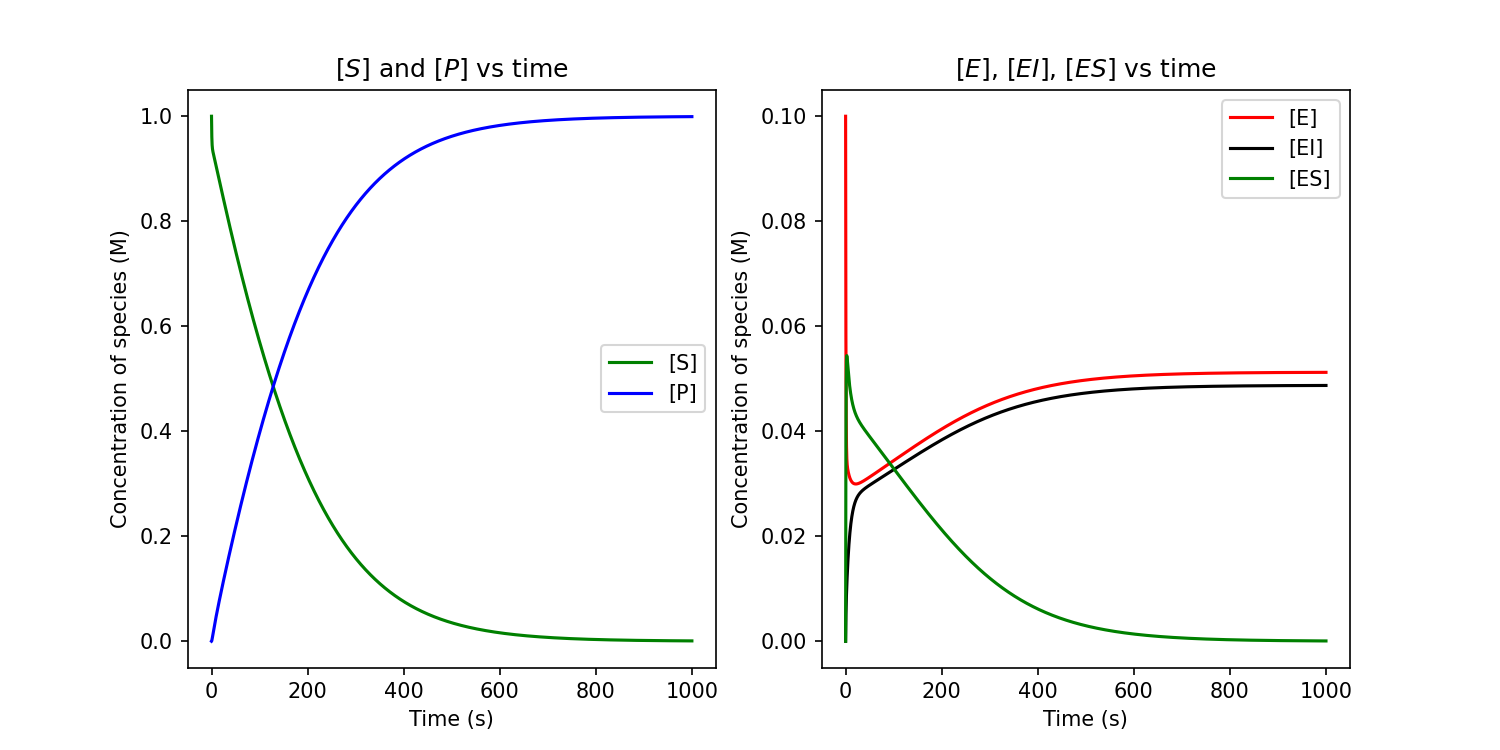

In [6]:
# parameters to put into function to generate lists
t = 1000
E= 0.1
S = 1
I = 1 
k2 = 0.1
k3 = 0.1
k_3 = 0.1

e, ei, es, s, p, time = comp_inhb(t, E, S, I, k2, k3, k_3)

# plotting graph of concentrations vs time
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax[0].plot(time, s, color = 'g', label = '[S]')
ax[0].plot(time, p, color = 'b', label = '[P]')
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Concentration of species (M)")
ax[0].set_title("$[S]$ and $[P]$ vs time")
ax[0].legend()

ax[1].plot(time, e, color = 'r', label = '[E]')
ax[1].plot(time, ei, color = 'k', label = '[EI]')
ax[1].plot(time, es, color = 'g', label = '[ES]')
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Concentration of species (M)")
ax[1].set_title("$[E]$, $[EI]$, $[ES]$ vs time")
ax[1].legend()

plt.show()

This graph shows similarity to the graph produced when there is no inhibitor used. However, there is one notable difference - the time taken for the reaction to plateau is noticeably longer. This is due to the effect of the inhibitor $I$, which reacts with $E$ to form $EI$, which is incapable of reaction with the substrate to produce the product. We are able to see this in the plot of enzyme-containing species vs time, with a considerable concentration of $EI$.

This reduces the effective concentration $[E]$, slowing the reaction. 


### A plot with widgets! You can adjust the initial inhibitor concentration in order to see the change in kinetics!


--------------------------One friendly note: if you want to use the widgets, please run the corresponding cell again.---------------------

<IPython.core.display.Javascript object>


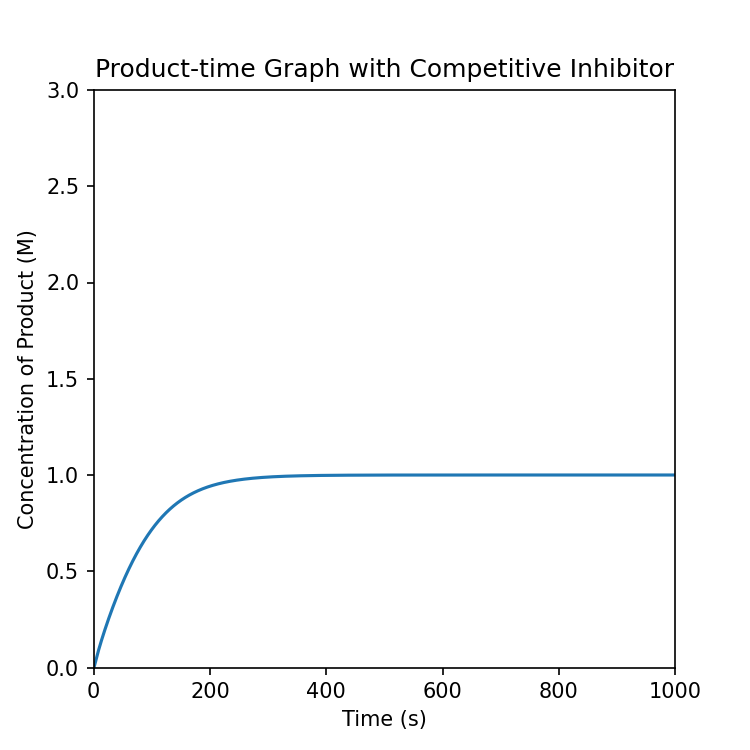

interactive(children=(FloatSlider(value=1.0, description='enzyme_factor', max=3.0), FloatSlider(value=1.0, des…

In [14]:
t = 1000
E= 0.1
S = 1
I = 1 
k2 = 0.1
k3 = 0.1
k_3 = 0.1

# extracting product conc. list and time list 
p, time = comp_inhb(t, E, S, I, k2, k3, k_3)[4:6]
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(time, p)
ax.set_ylim(0, 3)
ax.set_xlim(0,1000)
plt.xlabel("Time (s)")
plt.ylabel("Concentration of Product (M)")
plt.title("Product-time Graph with Competitive Inhibitor")

# plotting interactive graph with sliders to vary enzyme conc., substrate conc, and k2 rate. 
def update2(enzyme_factor = 1.00, substrate_factor = 1.00, inhibitor_factor = 1.00, 
           k2_factor = 1.00, k3_factor = 1.00):
    line.set_ydata(comp_inhb(1000, E= E * enzyme_factor, S = S * substrate_factor, I = I * inhibitor_factor,
                           k2=  k2 * k2_factor, k3 = k3 * k3_factor, k_3 = k_3)[4])
    fig.canvas.draw_idle()

interact(update2, enzyme_factor = widgets.FloatSlider(min=0, max= 3, value = 1), 
         substrate_factor = widgets.FloatSlider(min=0, max= 3, value = 1), 
         inhibitor_factor = widgets.FloatSlider(min=0, max= 3, value = 1),
         k2_factor = widgets.FloatSlider(min=0, max= 3, value = 1),
         k3_factor = widgets.FloatSlider(min=0, max= 3, value = 1))
plt.show()

#### Analysis of the graph:

Adjusting enzyme_factor, substrate_factor and k2_factor will have the same effects as section 2.2. 

If inhibitor_factor goes up, the initial rate goes down. For competitive inhibition, the inhibitor competes with the substrate for the active site. Hence, the higher $[I]$ is, the less binding sites will be available to catalyse the reaction of the substrate.

If k3_factor goes up, it means that the rate of binding of the inhibitor to the active site is higher. This will also decrease the initial rate.

No matter how we adjust k3_factor and inhibitor_factor, if substrate_factor does not change, the horizontal asymptote will not change.

## 2.5 A simpler way!

### As experimentally determining the values of $k_1$ and $k_{-1}$ is difficult, and instantaneous concentrations are difficult to determine a simplified rate equation, using an observed constant $K_m$, is often used. 

### The simplified rate equation for a one substrate and one product reaction is:

###  $v = \frac{v_{max}[S]}{K_m + [S]}$, where $K_m = \frac{k_{-1} + k_{2}}{k_1}$, $v_{max} = k_2[E]_o$

The value of $k_2$ can be determined experimentally by measuring the initial rate of product formation when the substrate is in large excess. <br> Since the substrate is in excess, this is the maximum rate of the reaction for this particular enzyme concentration. This rate is hence $v_{max}$, and thus $k_2$ = $\frac{v_{max}}{[E]_o}$ (Bosron, 1983).

The value of $K_m$ can be also determined experimentally as it is also the substrate concentration where the rate of reaction, $v$, is half of $v_{max}$. <br> This is so because when $K_m = [S]$, $v = \large \frac{v_{max}[S]}{[S] + [S]} = \frac{1}{2}v_{max}$

### This simplified equation is based on the following assumptions:
1. Assuming the reaction to be in steady-state, the concentration of enzyme-substrate complex does not change with time.
2. The concentration of complex is much smaller comparing to the substrate.
3. The substrate is in large excess. (Bosron, 1983)

In [8]:
def mich_mt_simpl(t, E, S, K_m, P=0):
    '''function t_hat takes the rate constants, time period and initial concentration of 
    each entity and generates lists of the concentrations of each entity over the time period'''
    
    # set regular time intervals, create empty lists to store the data generated
    time = 0 
    d_time = 0.01
    time_list = []
    S_list = []
    P_list = []
    
    # the 'while' loop allows continuous data generation
    while time < t:      
        # dissect the differential equations using Euler's method
        d_P = (k2 * E) * S * 1/(K_m + S) * d_time
        
        # slot the values into the lists
        P_list.append(P)
        S_list.append(S)
        time_list.append(time)       
        # update the new values
        P += d_P
        S = S - d_P       
        time += d_time
        
    return S_list, P_list, time_list

<IPython.core.display.Javascript object>


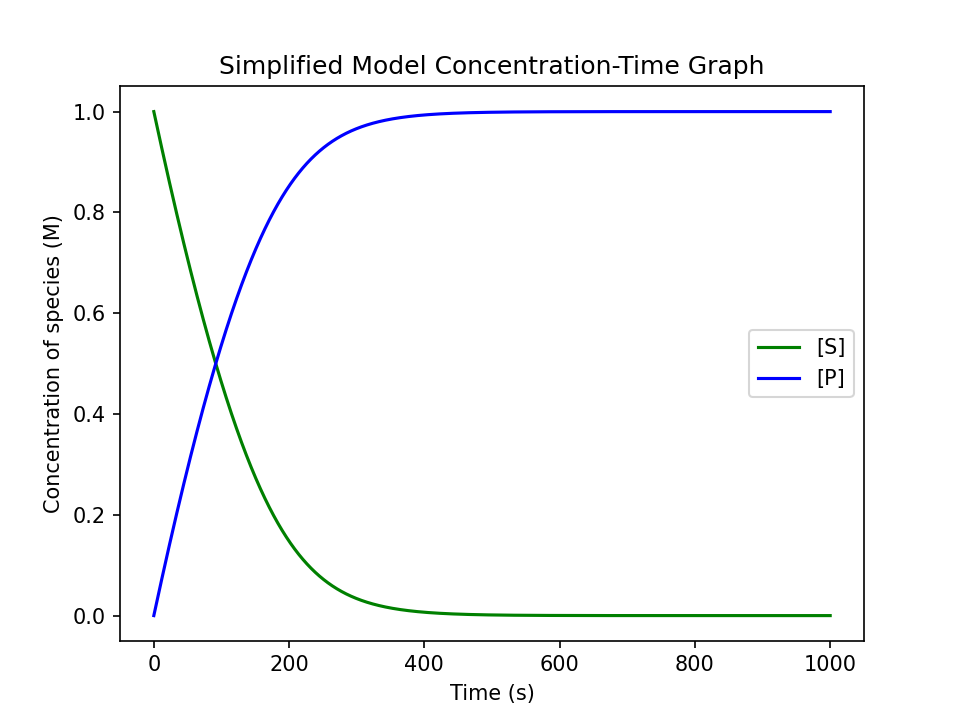

In [9]:
# parameters to put into function to generate lists
t = 1000
Eo = 0.1
S = 1
K_m = 0.6
k2 = 0.1 
s, p, time_list = mich_mt_simpl(t, Eo, S, K_m)

# plotting graph of concentrations vs time
fig, ax1 = plt.subplots(1,1)
ax1.plot(time_list, s, color = 'g', label = '[S]')
ax1.plot(time_list, p, color = 'b', label = '[P]')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Concentration of species (M)")
ax1.set_title("Simplified Model Concentration-Time Graph")

ax1.legend()
plt.show()

Comparing this graph to the Michaelis Menten Concentration-time Graph (Figure 1), we can see that the time taken for the reaction to complete is around 400s, and the shape of the Product and Substrate curves are very similiar, showing that this simplification is valid. 

One small thing to highlight is that this graph is smooth since t = 0, as it assumes steady-state kinetics immediately, however the Michaelis Menten Concentration-time Graph shows a sharper decrease of enzyme and substrate at the start. This is due to the pre-steady state conditions, where substrates binding to enzymes are dominant, and the complex concentration is increasing. 

## A simpler way for Competitive Inhibition

### The simplified rate equation for a one substrate and one product reaction with inhibition is:

###  $v = \frac{v_{max}[S]}{K_m^{app} + [S]},$ where <br><br>$K_m^{app} = K_m * (1 + \frac{k_3[I]}{k_{-3}})$ <br><br> $K_m = \frac{k_{-1} + k_{2}}{k_1},$ <br><br> $v_{max} = k_2[E]_o,$<br><br>




In [10]:
def mich_mt_simpl_comp(t, Eo, S, I, K_m, k3, k_3, P=0):
    '''function that takes the rate constants, time period and initial concentration of 
    each entity and generates lists of the concentrations of each entity over the time period'''
    
    # set regular time intervals, create empty lists to store the data generated
    time = 0 
    d_time = 0.01
    time_list = []
    S_list = []
    P_list = []
    K_mapp = K_m * (1 + (((k3*I)/k_3)))
    # the 'while' loop allows continuous data generation
    while time < t:      
        # dissect the differential equations using Euler's method
        d_P = (k2 * Eo) * S * 1/(K_mapp + S) * d_time
        
        # slot the values into the lists
        P_list.append(P)
        S_list.append(S)
        time_list.append(time)       
        # update the new values
        P += d_P
        S = S - d_P       
        time += d_time
        
    return S_list, P_list, time_list

<IPython.core.display.Javascript object>


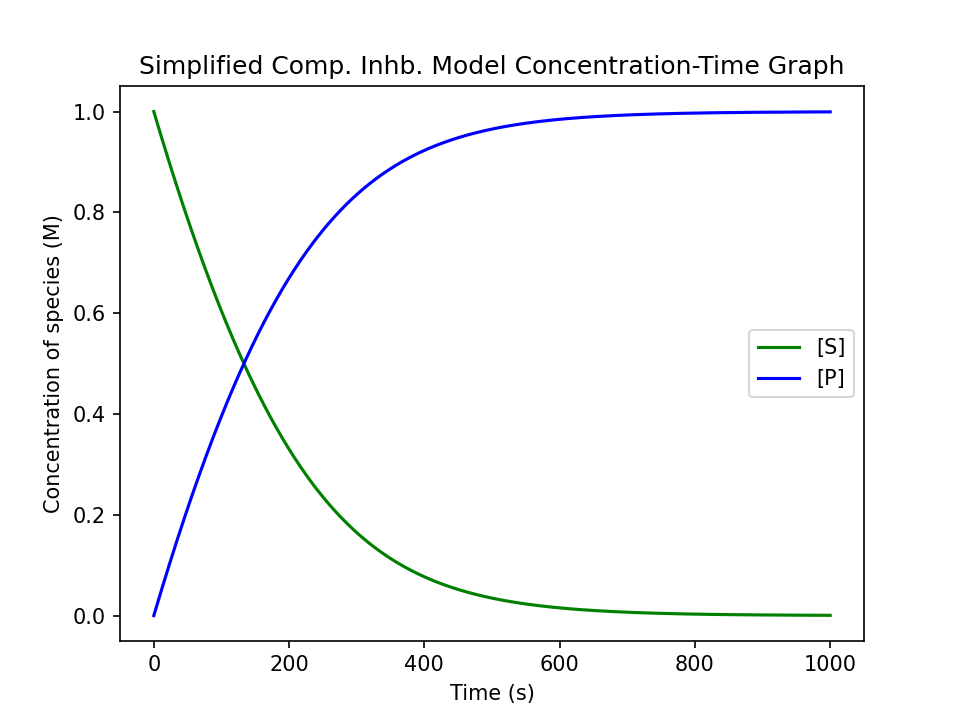

In [11]:
# parameters to put into function to generate lists
t = 1000
Eo = 0.1
S = 1
I = 1
K_m = 0.6
k2 = 0.1
k3 = 0.1
k_3 = 0.1
s, p, time = mich_mt_simpl_comp(t, E, S, I, K_m, k3, k_3)
# plotting graph of concentrations vs time
fig, ax2 = plt.subplots(1,1)
ax2.plot(time, s, color = 'g', label = '[S]')
ax2.plot(time, p, color = 'b', label = '[P]')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Concentration of species (M)")
ax2.set_title("Simplified Comp. Inhb. Model Concentration-Time Graph")

ax2.legend()
plt.show()

Comparing this graph to the Concentration-time Graph with Inhibitor (Figure 3), we can see that the reaction is slower, and the shape of the Product and Substrate curves are very similar, showing that this simplification is valid. 

# 3. An Advanced Model with Theorell-Chance Mechanism

However, in many scenarios, the enzyme does not behave according to Michaelis-Menten mechanism. Instead, some of them behave according to Theorell-Chance mechanism. The Theorell-Chance mechanism describes the scenario where an enzyme binds with two substrates in a fixed order. One example of such enzymes is the alcohol dehydrogenase (ADH), which catalyses the oxidation of alcohol to aldehyde (Dalziel, 1963).

Consider the reaction scheme below (which begins on the bottom right):

<img src ="https://github.com/waynelim123/Schrodingers-cats/blob/main/Screenshot%20(176).png?raw=true" width = 50%>
<center> (Atkinson, 1972) <center>
<br>
</center> $E$ for enzyme; $NAD$ for Nicotinamide Adenine Dinucleotide (first substrate of ADH); $NAD.E$ for NAD-enzyme complex; $EtOH$ for ethanol; $NADH.E$ for the NADH-enzyme complex.</center>

The enzyme first binds to $NAD$, forming $NAD.E$ complex. The $NAD.E$ complex thens reacts with ethanol, to form the $NADH.E$ complex and acetaldehyde ($MeCHO$). Finally, $NADH$ unbinds from the enzyme. 

### From the reaction scheme above, we can deduce these differential rate equations :

$\frac{d[E]}{dt}$ &emsp;&emsp;&ensp;&ensp;&nbsp;= $k_5 [NAD] [E] - k_1 [NADH] [E] + k_3 [NAD-E] + k_2 [NADH-E]$  
$\frac{d[NAD]}{dt}$ &emsp;&ensp;  =$ -k_5 [NAD] [E] + k_3 [NAD-E]$  
$\frac{d[NAD-E]}{dt}$ &ensp;= $k_5 [NAD] [E] - k_3 [NAD-E] - k_6 [NAD-E] [EtOH] + k_4 [NADH-E] [MeCHO]$  
$\frac{d[EtOH]}{dt}$ &emsp;&nbsp; = $k_4 [NADH-E][MeCHO] - k_6 [NAD-E][EtOH]$  
$\frac{d[MeCHO]}{dt}$ &emsp;&emsp;  = $ -\frac{d[EtOH]}{dt}$  
$\frac{d[NADH-E]}{dt}$= $-k_4 [NADH-E] [MeCHO] + k_6 [NAD-E] [EtOH] - k_2 [NADH-E] - k_1 [NADH] [E]$  
$\frac{d[NADH]}{dt}$ &ensp;&nbsp; = $k_2  [NADH-E] - k_1  [NADH][E]$ 

### Lastly, to code for this system, we will need the 6 rate constants, which luckily our reference paper provides: 
<img src = "https://github.com/waynelim123/Schrodingers-cats/blob/main/Screenshot%20(178).png?raw=true" width= 30%>
<center> (Atkinson, 1972) <center>

In [12]:
def theorell_chance(t, E, NAD, EtOH, NADH, k = [0, 3.7, 1.6, 37, 2.4, 3.0, 3.5], NAD_E = 0, MeCHO = 0, NADH_E= 0):
    
    time = 0
    dt = 0.001
    
    #E_list = []
    t_list = []
    #NAD_list = []
    #NAD_E_list = []
    EtOH_list = []
    MeCHO_list = []
    #NADH_list = []
    NADH_E_list = []
    
    while time <= t:
        
        #E_list.append(E)
        t_list.append(time)
        #NAD_list.append(NAD)
        #NAD_E_list.append(NAD_E)
        EtOH_list.append(EtOH)
        MeCHO_list.append(MeCHO)
        #NADH_list.append(NADH)
        NADH_E_list.append(NADH_E)
        
        dE = (-k[5] * NAD * E - k[1] * NADH * E + k[3] * NAD_E + k[2] * NADH_E) * dt
        dNAD = (-k[5] * NAD * E + k[3] * NAD_E) * dt
        dNAD_E = (k[5] * NAD * E - k[3] * NAD_E - k[6] * NAD_E * EtOH + k[4] * NADH_E * MeCHO) * dt
        dEtOH = (k[4] * NADH_E * MeCHO - k[6] * NAD_E * EtOH) * dt
        dMeCHO = -1 * dEtOH
        dNADH_E = (-k[4] * NADH_E * MeCHO + k[6] * NAD_E * EtOH - k[2] * NADH_E + k[1] * NADH * E) * dt
        dNADH = (k[2] * NADH_E - k[1] * NADH * E) * dt
        
        E += dE
        NAD += dNAD
        NAD_E += dNAD_E
        EtOH += dEtOH
        MeCHO += dMeCHO
        NADH_E += dNADH_E
        NADH += dNADH
        time += dt
        
    return MeCHO_list, NADH_E_list, EtOH_list, t_list

### Let's plot!

<IPython.core.display.Javascript object>


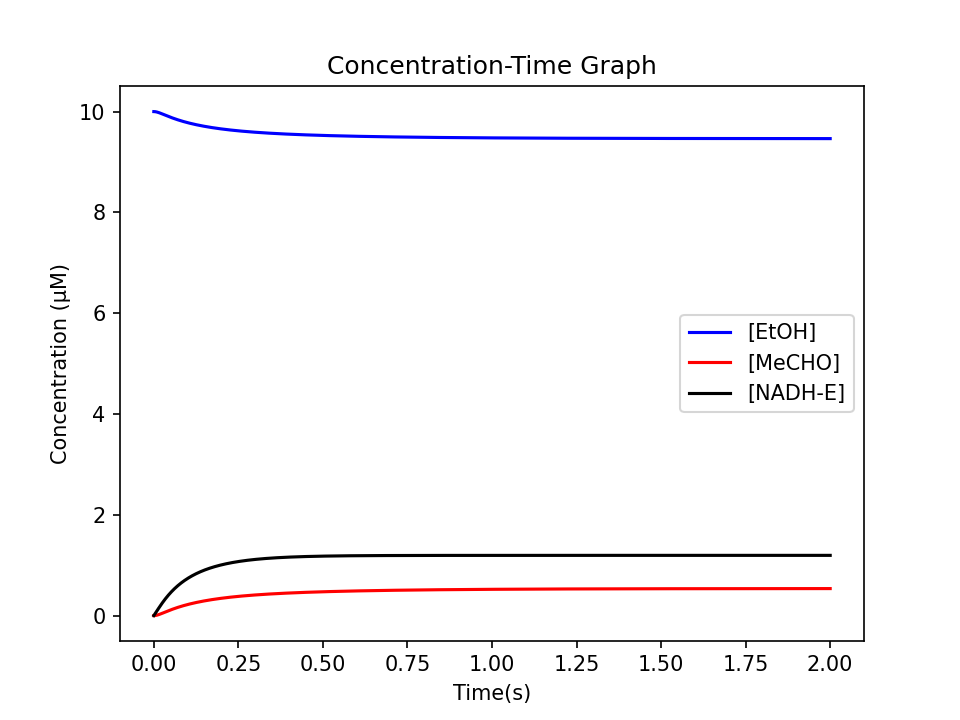

In [13]:
t = 2
E = 2
NAD = 1.34
NADH= 1.34
EtOH = 10


MeCHO, nadhe, ethanol, time = theorell_chance(t, E, NAD, EtOH, NADH)
    
fig,ax3 = plt.subplots(1,1)

ax3.plot(time, ethanol, color = "b", label = "[EtOH]")
ax3.plot(time, MeCHO, color = 'r', label = '[MeCHO]')
ax3.plot(time, nadhe, color = 'k', label = '[NADH-E]')
ax3.set_title("Concentration-Time Graph")
ax3.set_xlabel("Time(s)")
ax3.set_ylabel("Concentration (μM)")

plt.legend()
plt.show()


#### Analysis of the graph:
 
This graph shows the exact variations of the substances with respect to time.

In this case, the limiting reagent is $NAD^+$, hence the amounts of $MeCHO$ and $NADH-E$ formed are restricted.

# 4. Conclusion

We have demonstrated the modelling of Michaelis-Menten enzyme kinetics through Euler's method and a simplification using a number of assumptions, and demonstrated the effects of competitive inhibition through graphing. Additionally, we have explored the Theorell-Chance mechanism, and its application to alcohol dehydrogenase. Through the usage of python graphing, we hope we have clarified this topic.   